### Import relevant packages

In [41]:
import pandas as pd

from helper_functions_general import read_data, get_impl_date
from definitions import data_path, show_plots, data_source_path, figures_path_meth, \
    target_countries, fig_size, show_plots, save_figs, show_results
from plot_functions import plot_corr
from statistical_tests import stat_test

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler
import numpy as np

### Raw data

In [42]:
var_name = 'co2'
data = read_data(source_path=data_path, file_name=f'{var_name}_m')

# describe data
print(data.info())
print(data.describe())
print("\n")

print(f"# missing: {sum(data[var_name].isna())}")
if var_name != 'brent':
    print(f"# countries: {len(data['country'].unique())}")
    print(f"countries: {data['country'].unique()}")
    print("\n")
    
    print(data[data[var_name].isna()].groupby('country').count())
    print(data[data[var_name].isna()].groupby('country').max() + 1)
    print("\n")
    
    print(f"within-country std: \n{data.groupby('country').std().mean()[var_name]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4560 non-null   object 
 1   date     4560 non-null   object 
 2   year     4560 non-null   int64  
 3   month    4560 non-null   int64  
 4   co2      4560 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 178.2+ KB
None
              year        month           co2
count  4560.000000  4560.000000  4.560000e+03
mean   2009.500000     6.500000  1.649718e+10
std       5.766914     3.452431  1.939575e+10
min    2000.000000     1.000000  9.265613e+08
25%    2004.750000     3.750000  4.359616e+09
50%    2009.500000     6.500000  7.941463e+09
75%    2014.250000     9.250000  2.543950e+10
max    2019.000000    12.000000  1.097771e+11


# missing: 0
# countries: 19
countries: ['austria' 'belgium' 'bulgaria' 'croatia' 'czech republic' 'france'
 'germany' 'greece' 'hungary' 'irel

### Total set

In [49]:
df = read_data(source_path=data_path, file_name='total_m')
df_stat = read_data(source_path=data_path, file_name='total_m_stat')

df

,country,date,year,month,co2,gdp,pop,co2_cap,gdp_cap
0,austria,2000-01-01,2000,1,9.726928e+09,2.309478e+11,8.003000e+09,1.215410,28.857653
1,austria,2000-02-01,2000,2,8.532685e+09,2.321217e+11,8.004700e+09,1.065959,28.998180
2,austria,2000-03-01,2000,3,8.134567e+09,2.332957e+11,8.006400e+09,1.016008,29.138647
3,austria,2000-04-01,2000,4,6.546738e+09,2.344696e+11,8.008100e+09,0.817514,29.279055
4,austria,2000-05-01,2000,5,5.603262e+09,2.352176e+11,8.010100e+09,0.699525,29.365122
...,...,...,...,...,...,...,...,...,...
4517,united kingdom,2019-06-01,2019,6,2.864851e+10,3.302814e+12,6.684433e+10,0.428585,49.410534
4518,united kingdom,2019-07-01,2019,7,2.872032e+10,3.322513e+12,6.686800e+10,0.429508,49.687638
4519,united kingdom,2019-08-01,2019,8,2.809851e+10,3.338771e+12,6.689167e+10,0.420060,49.913109
4520,united kingdom,2019-09-01,2019,9,3.070698e+10,3.355029e+12,6.691533e+10,0.458893,50.138420


True


<AxesSubplot:xlabel='date'>

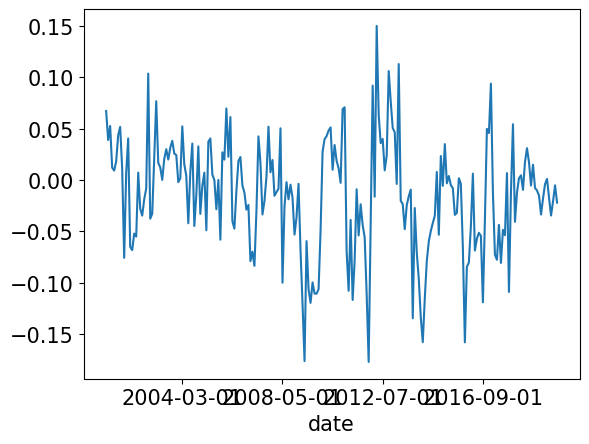

In [59]:
country = 'united kingdom'

df_country = df[df['country']==country].set_index('date')['co2']
df_cor = np.log(df_country).diff(12)

print(stat_test(df_cor.dropna(), sign_level=0.05))
df_cor.plot()

<AxesSubplot:xlabel='year'>

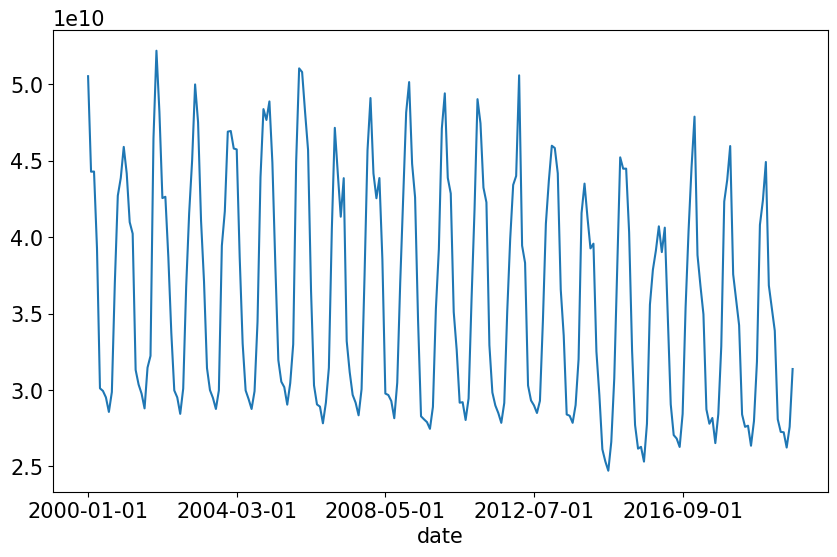

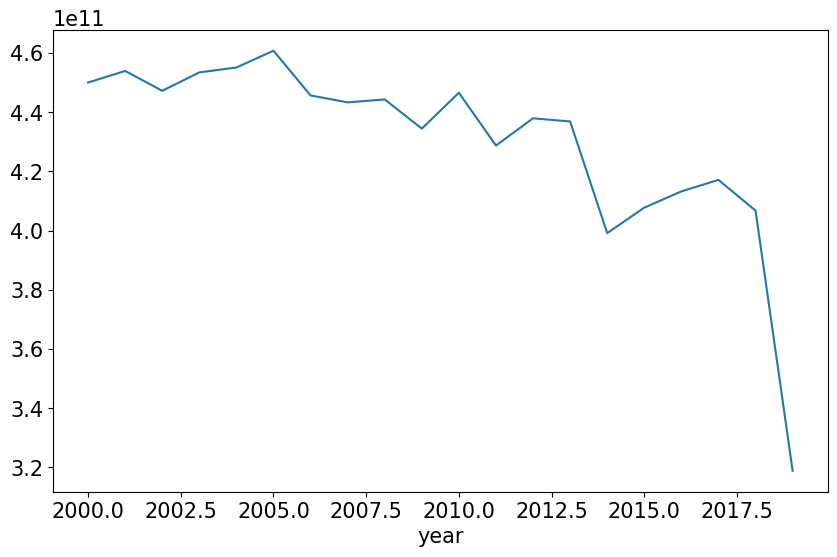

In [28]:
country = 'france'

df_country_month = df[df['country']==country].set_index('date')['co2']
# print(df_country_month)
plt.figure(0, figsize=fig_size)
df_country_month.plot()

df_country_year = df[df['country']==country].groupby(['year']).sum()['co2']
# print(df_country_year)
plt.figure(1, figsize=fig_size)
df_country_year.plot()

### GHG target countries

In [11]:
print(get_impl_year())

{'switzerland': 2008, 'ireland': 2010, 'united kingdom': 2013, 'france': 2014, 'portugal': 2015}


<AxesSubplot:xlabel='date'>

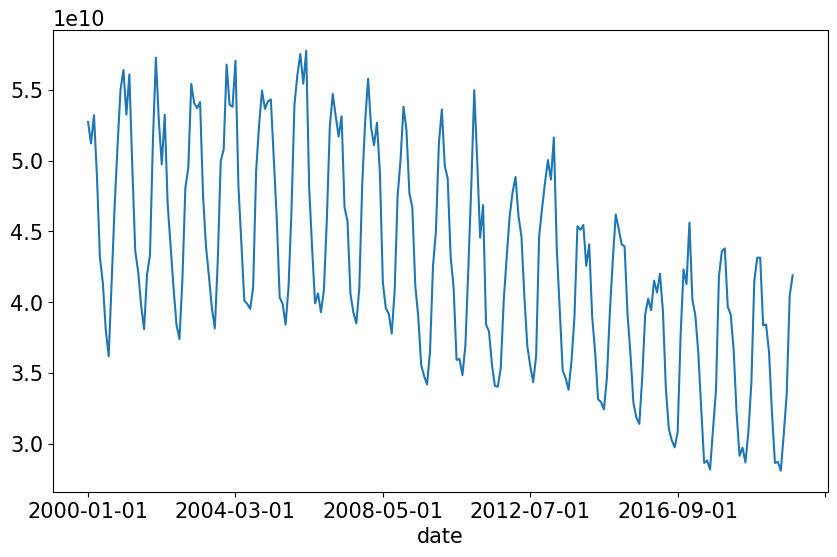

In [16]:
df[df['country'] == 'france'].set_index('date')['co2']
df_target.plot(figsize=fig_size)

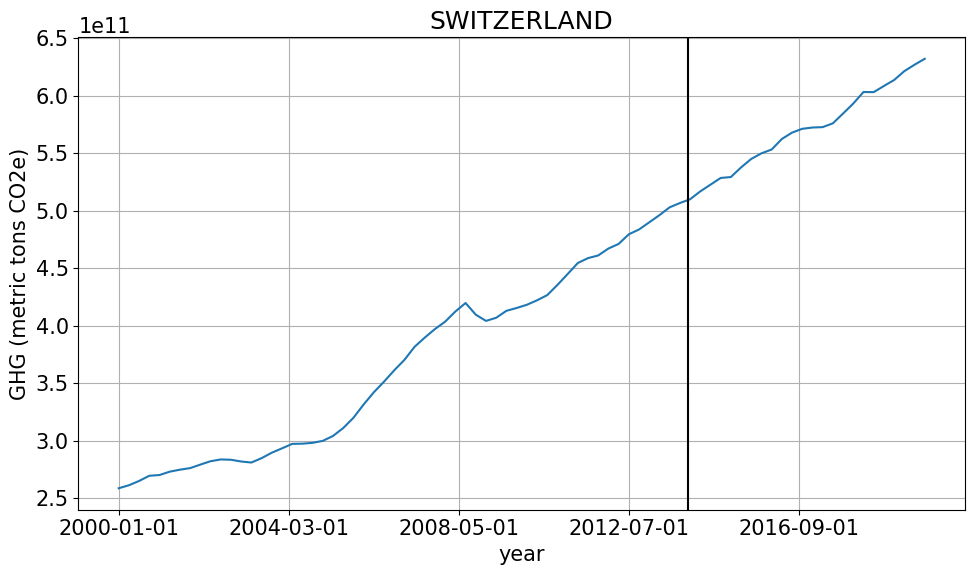

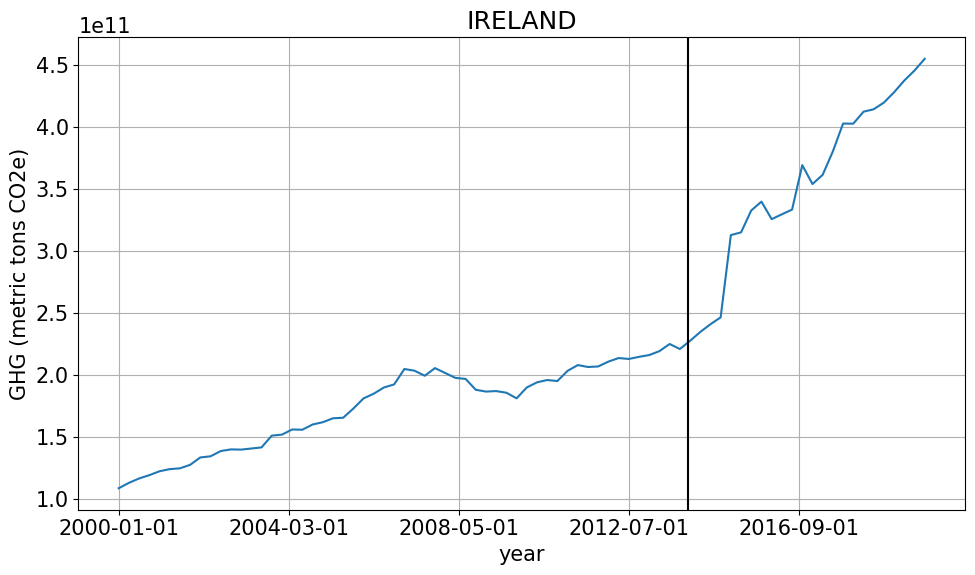

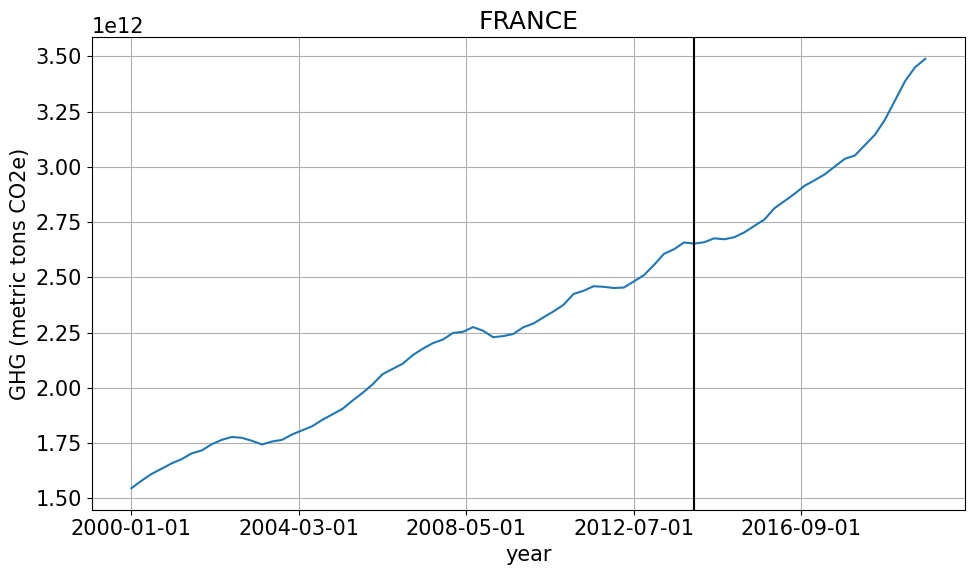

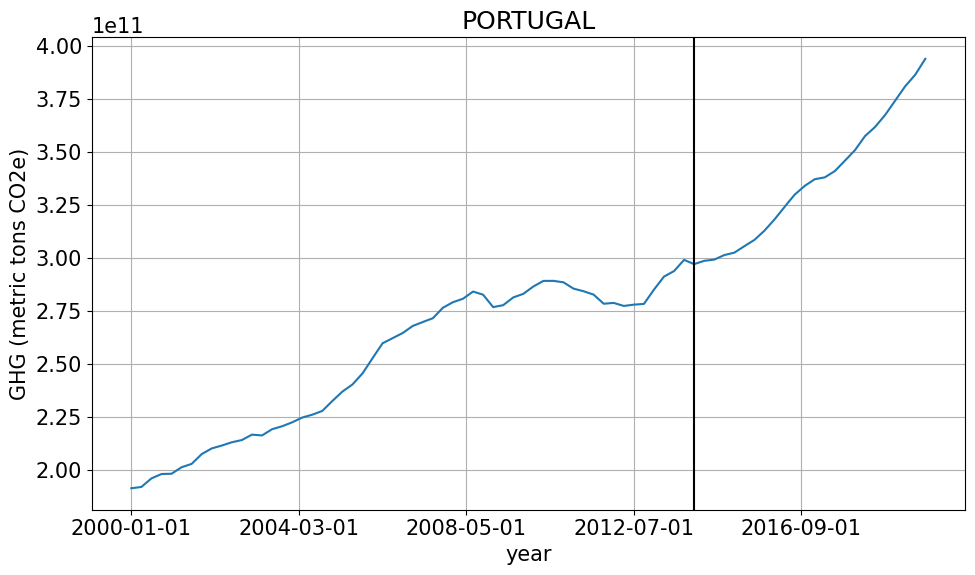

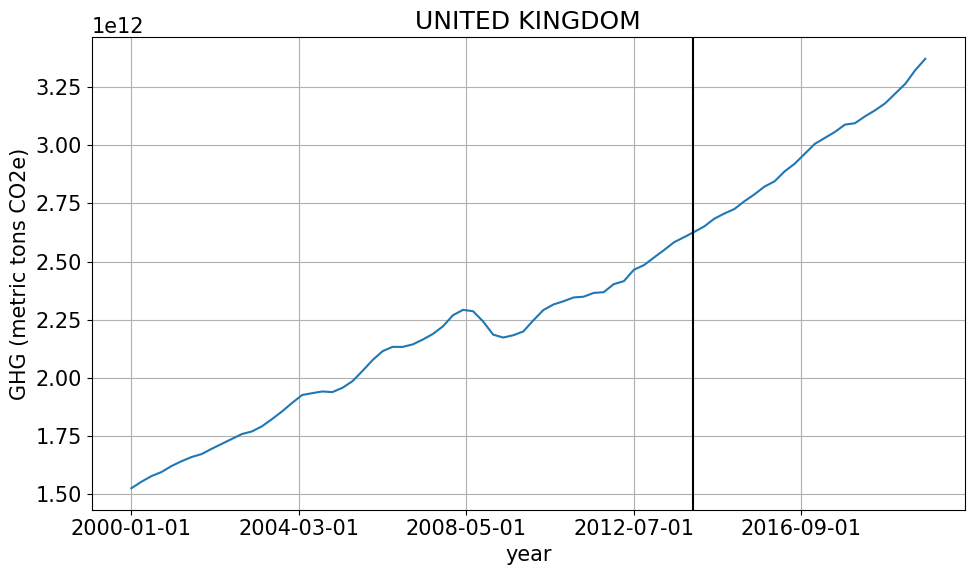

In [20]:
for country in target_countries:
    plt.figure(figsize=fig_size)
    df_target = df[df['country'] == country].set_index('date')['gdp']
    df_target.plot(figsize=fig_size)
    plt.title(country.upper())
    plt.xlabel('year')
    plt.ylabel('GHG (metric tons CO2e)')
    plt.grid()
    plt.tight_layout()
    plt.axvline(get_impl_year(country)/12, color='black')
    if save_figs:
        plt.savefig(f"{figures_path}ghg_{country}.png")
    if show_plots:
        plt.show()

### Correlation matrix

In [8]:
def corr_matrix(df):
    df_cor = df.copy()
    df_cor = df_cor[df_cor['country'] == target_country]
    df_cor = df_cor.drop(['country', 'year'], axis=1)
    cor_matrix = df_cor.corr()
    if show_plots:
        plot_corr(matrix=cor_matrix)

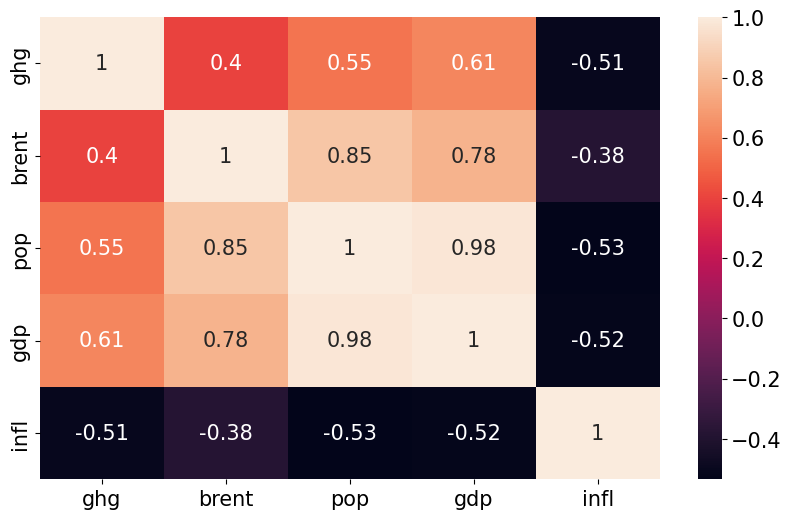

In [9]:
corr_matrix(df)

### Series

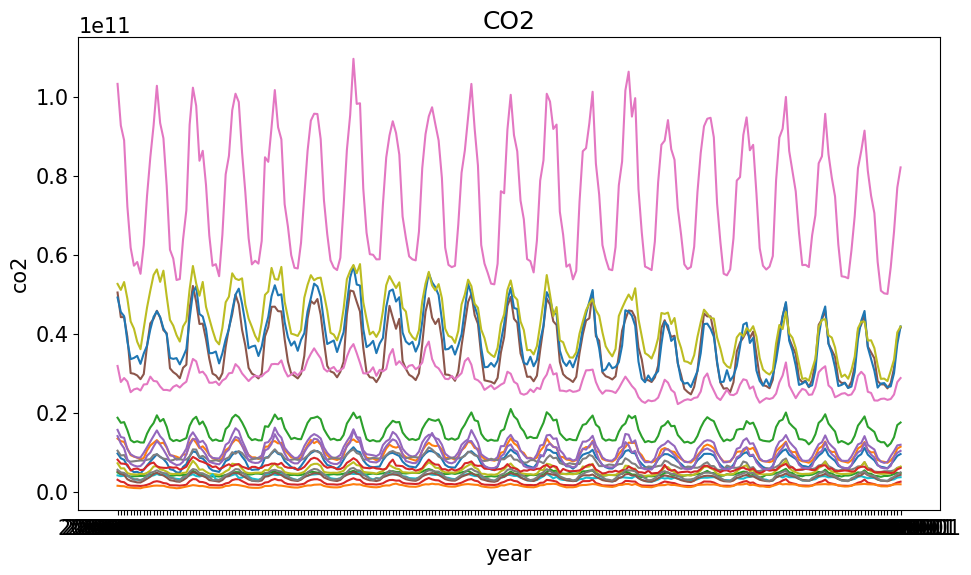

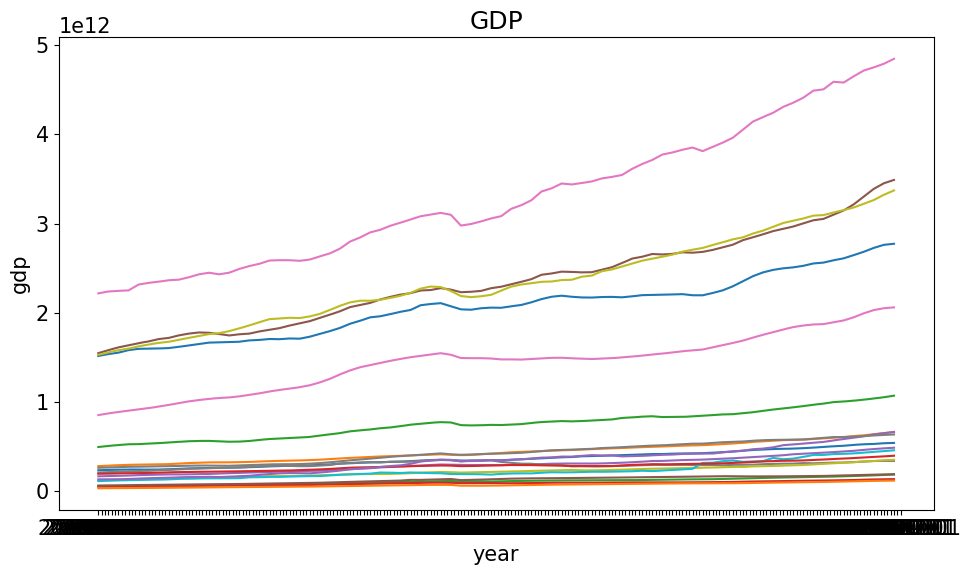

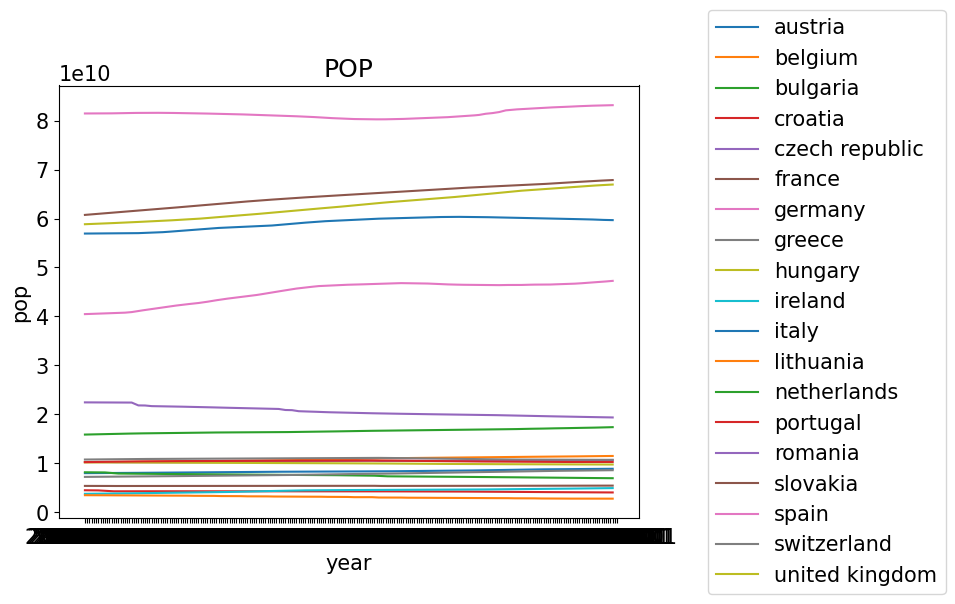

In [30]:
for series in trans.keys():

    df_pivot = df.pivot(index='date', columns='country', values=series)
    df_scale = df_pivot

    plt.figure(figsize=fig_size)
    plt.plot(df_pivot.index, df_scale, label=df_pivot.columns)
    plt.title(series.upper())
    plt.xlabel('year')
    plt.ylabel(f"{series}")
    if series == 'pop':
        plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.tight_layout()
    if save_figs:
        plt.savefig(f"{figures_path}methodology/{series}.png")
    if show_plots:
        plt.show()

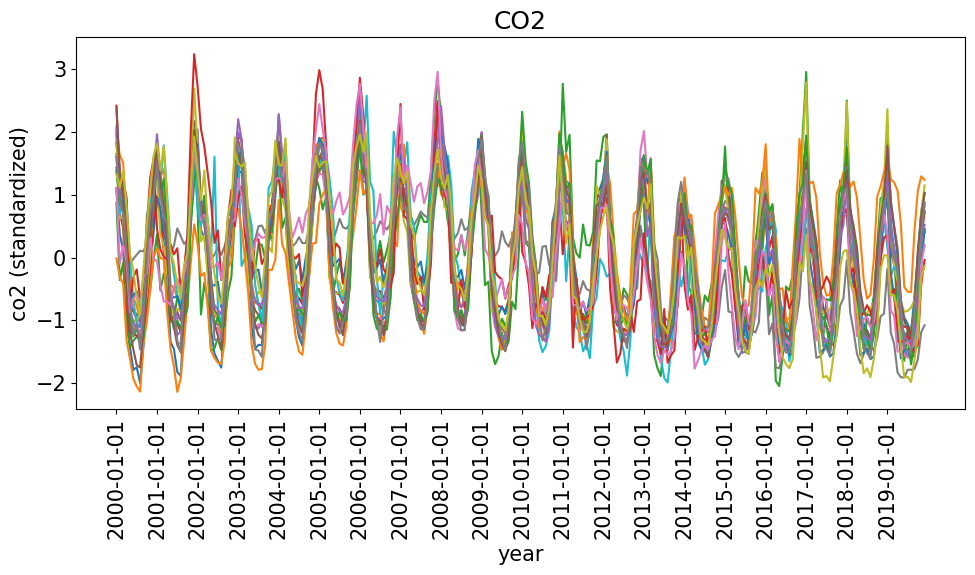

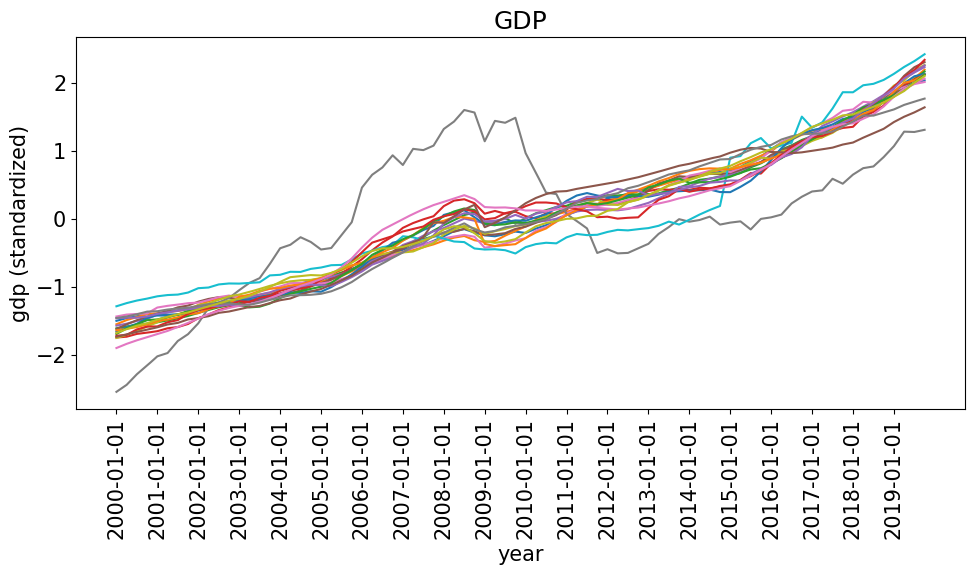

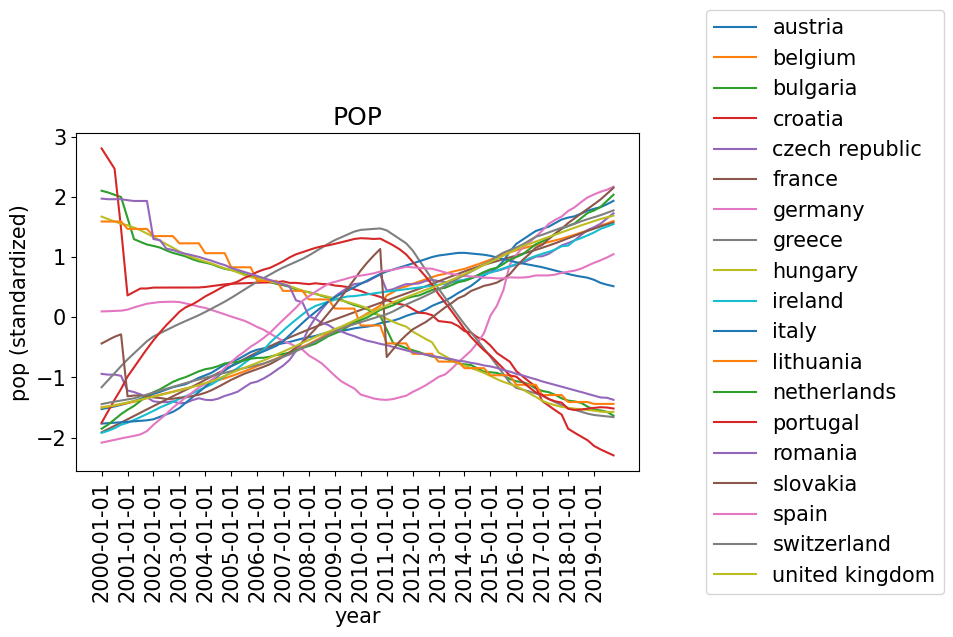

In [56]:
scaler = StandardScaler()

for series in trans.keys():

    df_pivot = df.pivot(index='date', columns='country', values=series)
    df_scale = scaler.fit_transform(df_pivot)

    plt.figure(figsize=fig_size)
    plt.plot(df_pivot.index, df_scale, label=df_pivot.columns)
    
    plt.title(series.upper())
    plt.xticks([df_pivot.index[12*i] for i in range(int(len(df_pivot)/12))], rotation='vertical')
    plt.xlabel('year')
    plt.ylabel(f"{series} (standardized)")
    if series == 'pop':
        plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.tight_layout()
    if save_figs:
        plt.savefig(f"{figures_path}methodology/{series}_stand.png")
    if show_plots:
        plt.show()